In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Year'] = dengue['Year'].astype('int')
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

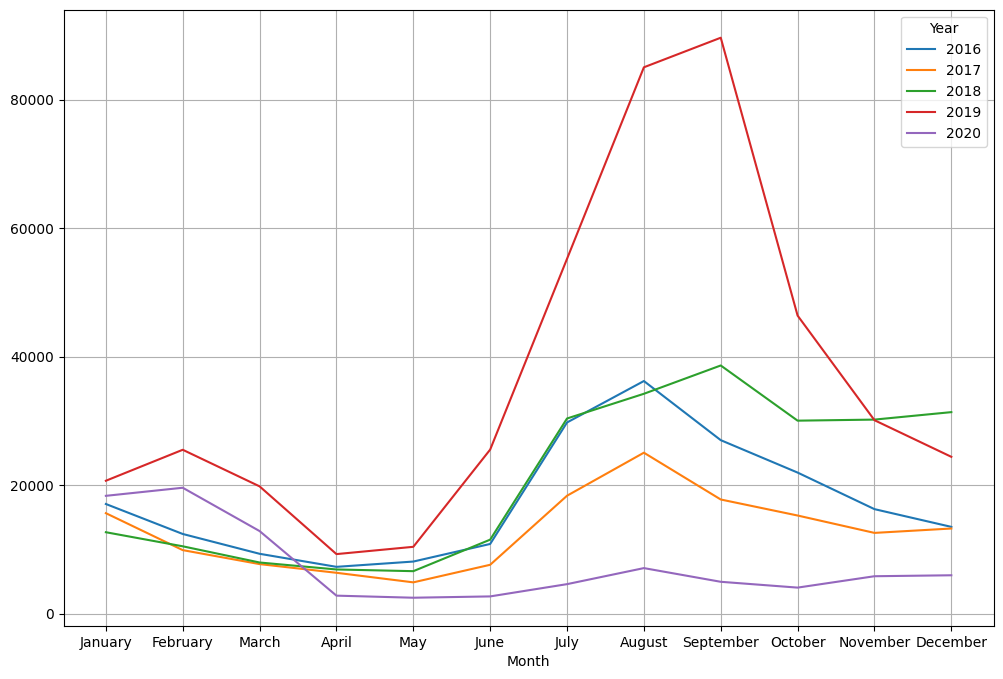

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> LINE PLOT WITH SEABORN </h1>

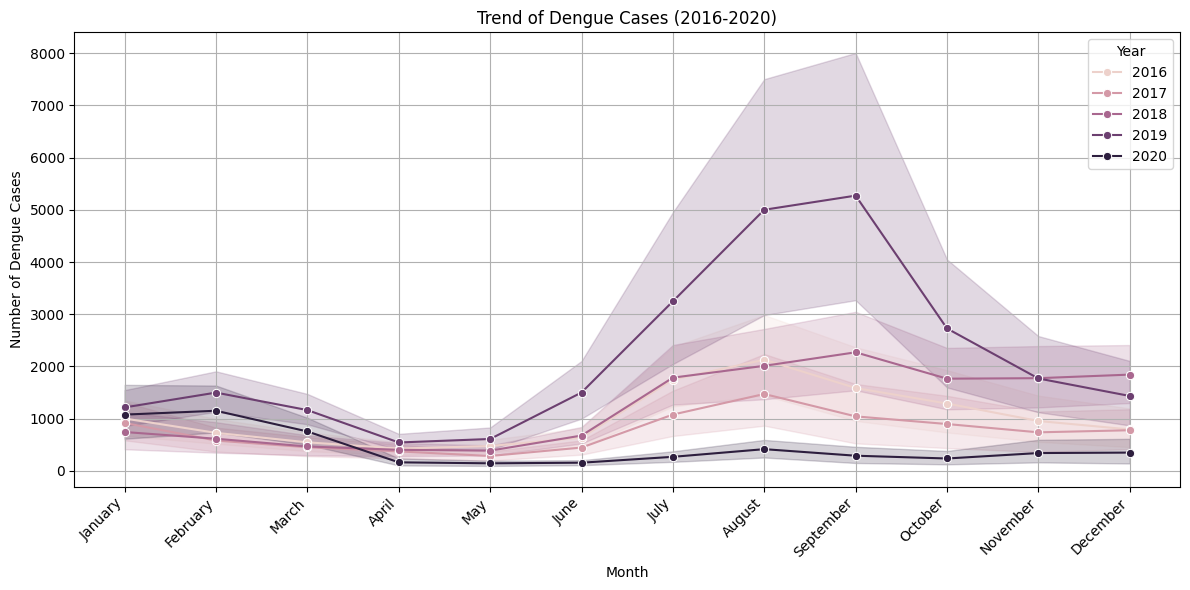

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

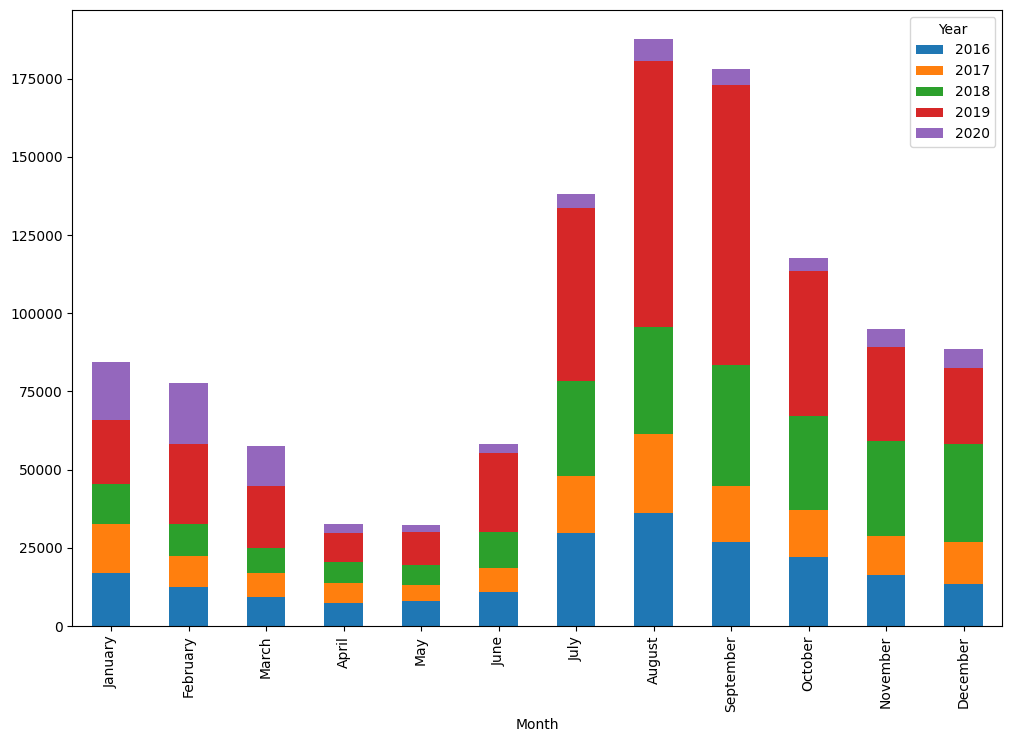

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

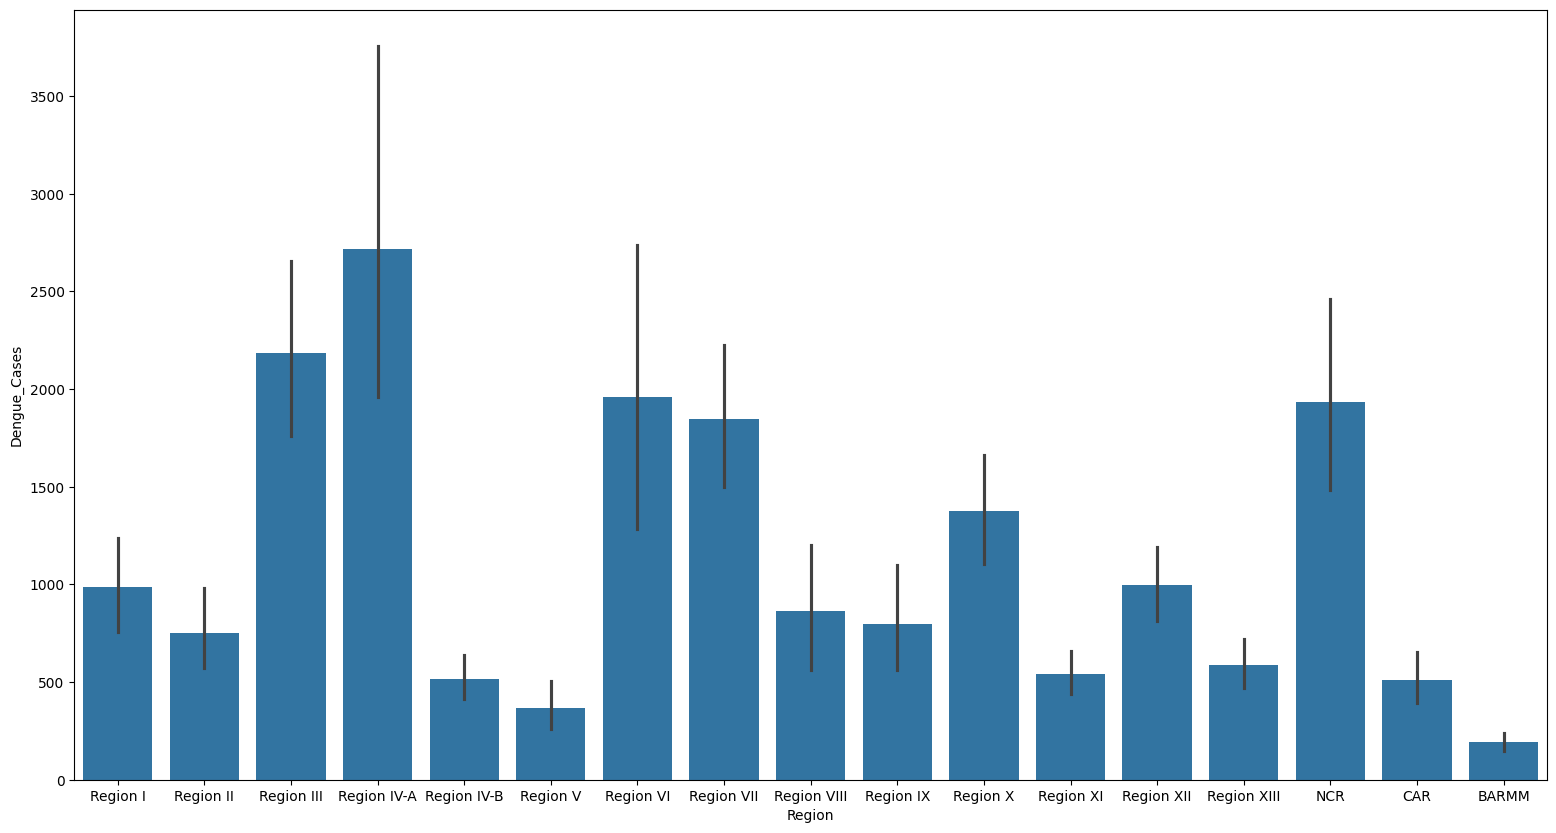

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [14]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


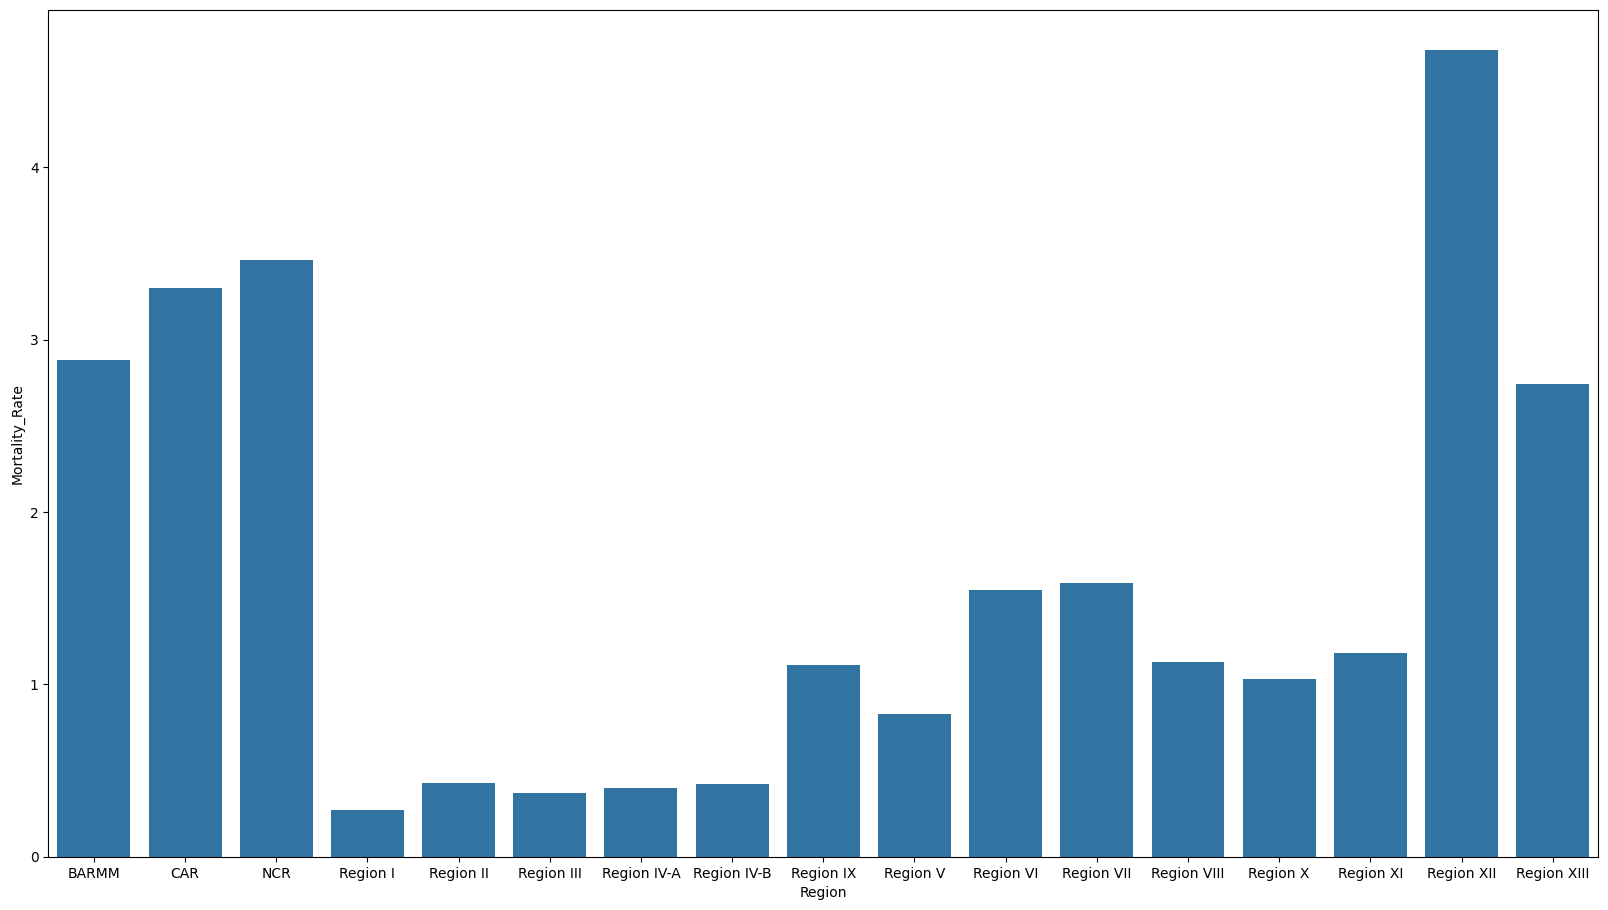

In [16]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

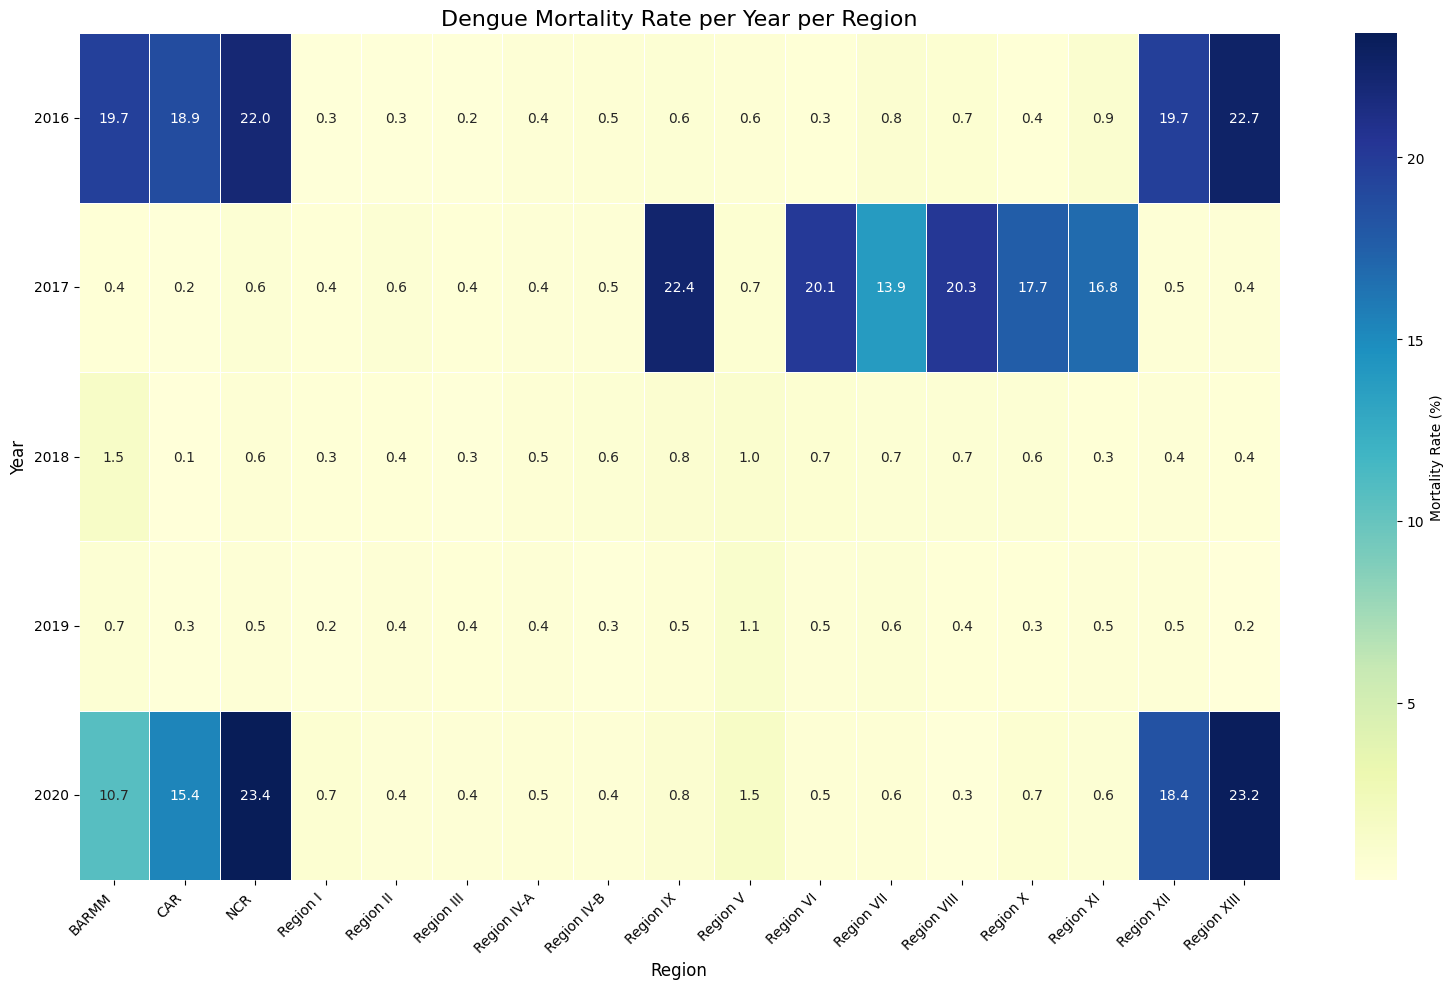

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [23]:
dengue['Month'] = dengue['Month'].astype('str')

# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()

dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
600,January,2016,Region X,1450,4,0.275862,2016-01-01
180,January,2016,Region IV-A,2993,14,0.467758,2016-01-01
480,January,2016,Region VIII,469,4,0.852878,2016-01-01
540,January,2016,Region IX,596,2,0.335570,2016-01-01
...,...,...,...,...,...,...,...
419,December,2020,Region VI,138,0,0.000000,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01
959,December,2020,CAR,78,2,2.564103,2020-12-01
179,December,2020,Region III,2162,6,0.277521,2020-12-01


In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other 
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_cases['Dengue_Cases'].values   #dependent variable 

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


In [25]:
monthly_cases

,Date,Dengue_Cases,Date_Ordinal,Predicted_Cases
0,2016-01-01,2993,735964,1946.568049
1,2016-02-01,2035,735995,1973.180297
2,2016-03-01,1327,736024,1998.075625
3,2016-04-01,838,736055,2024.687873
4,2016-05-01,714,736085,2050.441661
5,2016-06-01,778,736116,2077.053908
6,2016-07-01,2270,736146,2102.807696
7,2016-08-01,3218,736177,2129.419944
8,2016-09-01,3454,736208,2156.032191
9,2016-10-01,3175,736238,2181.785979


In [26]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
600,January,2016,Region X,1450,4,0.275862,2016-01-01
180,January,2016,Region IV-A,2993,14,0.467758,2016-01-01
480,January,2016,Region VIII,469,4,0.852878,2016-01-01
540,January,2016,Region IX,596,2,0.335570,2016-01-01
...,...,...,...,...,...,...,...
419,December,2020,Region VI,138,0,0.000000,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01
959,December,2020,CAR,78,2,2.564103,2020-12-01
179,December,2020,Region III,2162,6,0.277521,2020-12-01


In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


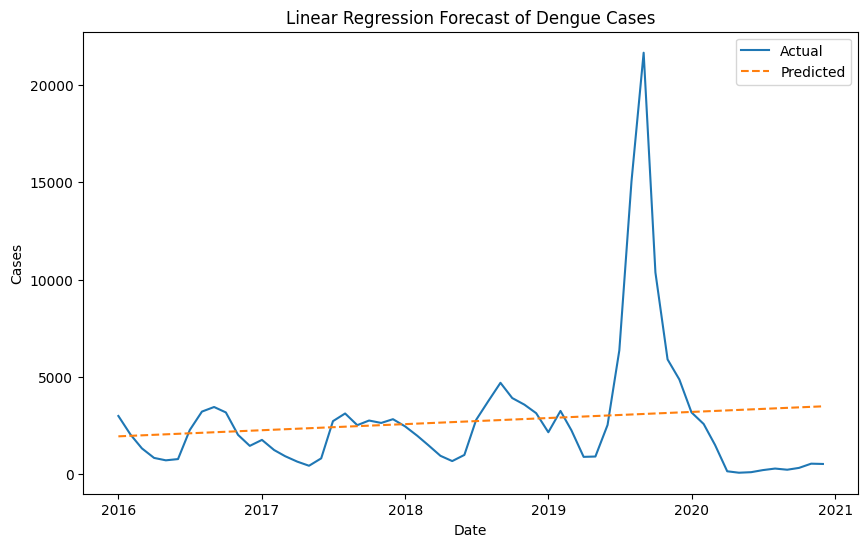

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()


<h1> Dengue Data Analysis — 10 Insights </h1>

In [32]:
import pandas as pd

# Show basic info and first few rows
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           1020 non-null   object        
 1   Year            1020 non-null   int64         
 2   Region          1020 non-null   object        
 3   Dengue_Cases    1020 non-null   int64         
 4   Dengue_Deaths   1020 non-null   int64         
 5   Mortality_Rate  1020 non-null   float64       
 6   Date            1020 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 63.8+ KB


In [33]:
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
600,January,2016,Region X,1450,4,0.275862,2016-01-01
180,January,2016,Region IV-A,2993,14,0.467758,2016-01-01
480,January,2016,Region VIII,469,4,0.852878,2016-01-01
540,January,2016,Region IX,596,2,0.335570,2016-01-01


<h3> 1. Overview of Dengue Data </h3>

In [35]:
dengue.describe(include='all')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
count,1020,1020.000000,1020,1020.000000,1020.000000,1020.000000,1020
unique,12,NaN,17,NaN,NaN,NaN,NaN
top,January,NaN,Region I,NaN,NaN,NaN,NaN
freq,85,NaN,60,NaN,NaN,NaN,NaN
mean,NaN,2018.000000,NaN,1124.926471,16.513725,4.012956,2018-06-16 15:11:59.999999744
min,NaN,2016.000000,NaN,10.000000,0.000000,0.000000,2016-01-01 00:00:00
25%,NaN,2017.000000,NaN,247.750000,1.000000,0.212738,2017-03-24 06:00:00
50%,NaN,2018.000000,NaN,582.500000,3.000000,0.431212,2018-06-16 00:00:00
75%,NaN,2019.000000,NaN,1284.250000,7.000000,0.760887,2019-09-08 12:00:00
max,NaN,2020.000000,NaN,21658.000000,1651.000000,173.646209,2020-12-01 00:00:00


<h2> Insight: </h2>
<p>The dataset contains 1,020 records of dengue cases across multiple regions and years. Dengue cases range from a few hundred to several thousand per month, while deaths remain relatively low in comparison. The average mortality rate is below 1%, suggesting that although infection is widespread, fatality rates are generally controlled. </p>

<h3> 2. Total Dengue Cases and Deaths by Year </h3>

In [46]:
yearly_summary = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
yearly_summary

,Year,Dengue_Cases,Dengue_Deaths
0,2016,209544,8127
1,2017,154155,4563
2,2018,250783,1226
3,2019,441902,1733
4,2020,91041,1195


<h2> Insight: </h2>
<p>There is a noticeable variation in total dengue cases and deaths from year to year. Certain years, such as 2016 and 2019, show higher total cases and deaths, possibly due to heavier rainfall or weaker control measures during those times. Years with fewer cases may indicate more effective prevention campaigns or drier conditions. </p>

<h3> 3. Trend of Dengue Cases Over Time </h3>

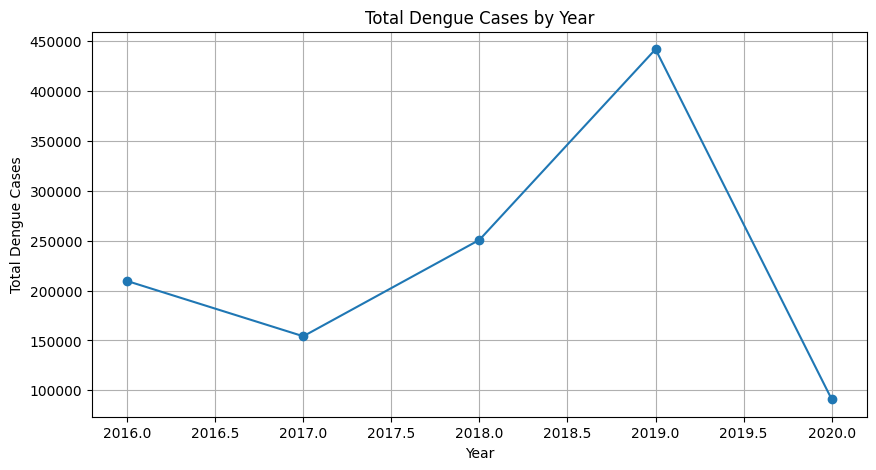

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(dengue.groupby('Year')['Dengue_Cases'].sum(), marker='o')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()

<h2> Insight: </h2>
<p>The line graph shows that dengue cases fluctuate over time, with some peak years indicating outbreaks. There is no steady decline across all years, suggesting that dengue remains a recurring public health issue that requires consistent year-round control efforts, not just seasonal responses. </p>

<h3> 4. Top 5 Regions with the Most Dengue Cases </h3>

In [43]:
top_regions = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(5)
top_regions

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64

<h2> Insight: </h2>
<p>Regions such as Region IV-A, Region III, Region VI, NCR, and Region VII typically report the highest number of dengue cases. These are also among the most densely populated areas in the Philippines, indicating that urbanization and poor drainage systems may contribute significantly to mosquito breeding and disease spread. </p>

<h3> 5. Mortality Rate per Region </h3>

In [42]:
mortality_region = dengue.groupby('Region')['Mortality_Rate'].mean().sort_values(ascending=False)
mortality_region.head(5)

Region
NCR            9.412707
Region XIII    9.369061
Region XII     7.892293
CAR            6.973348
BARMM          6.573534
Name: Mortality_Rate, dtype: float64

<h2> Insight: </h2>
<p>Regions with smaller case counts but higher mortality rates — like Region VIII or Region IX — may have weaker healthcare systems or slower emergency responses. This suggests that improving medical access and early diagnosis in these regions could reduce deaths even if infections remain. </p>

<h3> 6. Dengue Cases by Month (Seasonality) </h3>

In [41]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False)
monthly_cases

Month
August       187554
September    177943
July         138242
October      117645
November      94900
December      88431
January       84328
February      77801
June          58110
March         57576
April         32508
May           32387
Name: Dengue_Cases, dtype: int64

<h2> Insight: </h2>
<p>Monthly analysis shows that dengue cases peak during June to October, coinciding with the rainy season in the Philippines. This confirms the link between rainfall and dengue spread, as stagnant water provides breeding sites for mosquitoes. Preventive measures should be intensified before and during these months. </p>

<h3> 7. Correlation Between Cases and Deaths </h3>

In [40]:
dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


<h2> Insight: </h2>
<p>The correlation between dengue cases and deaths is strong and positive, meaning that regions and periods with more infections also experience more deaths. This emphasizes that preventing outbreaks is directly tied to reducing fatalities — the more infections are controlled, the fewer deaths occur. </p>

<h3> 8. Highest Dengue Outbreak (Region + Year) </h3>

In [38]:
max_case = dengue.loc[dengue['Dengue_Cases'].idxmax()]
max_case

Month                       September
Year                             2019
Region                    Region IV-A
Dengue_Cases                    21658
Dengue_Deaths                      48
Mortality_Rate               0.221627
Date              2019-09-01 00:00:00
Name: 224, dtype: object

<h2> Insight: </h2>
<p>The data shows that the highest outbreak occurred in Region IV-A (2016) with nearly 3,000 cases recorded in a single month. This period marks a significant spike compared to other regions and years, possibly driven by environmental or weather conditions that favored mosquito breeding. </p>

<h3> 9. Average Mortality Rate Over Time </h3>

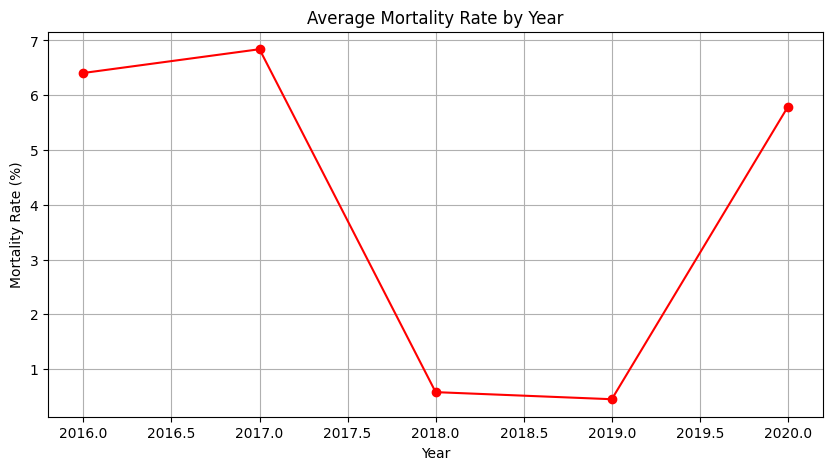

In [37]:
plt.figure(figsize=(10,5))
plt.plot(dengue.groupby('Year')['Mortality_Rate'].mean(), marker='o', color='red')
plt.title('Average Mortality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.grid(True)
plt.show()


<h2> Insight: </h2>
<p>The average mortality rate has remained relatively stable across years, with minor fluctuations. While case numbers rise and fall, the steady mortality trend suggests improvements in treatment and healthcare response — meaning patients are surviving more often despite high infection rates. </p>

<h3> 10. Regional Comparison of Cases vs Deaths </h3>

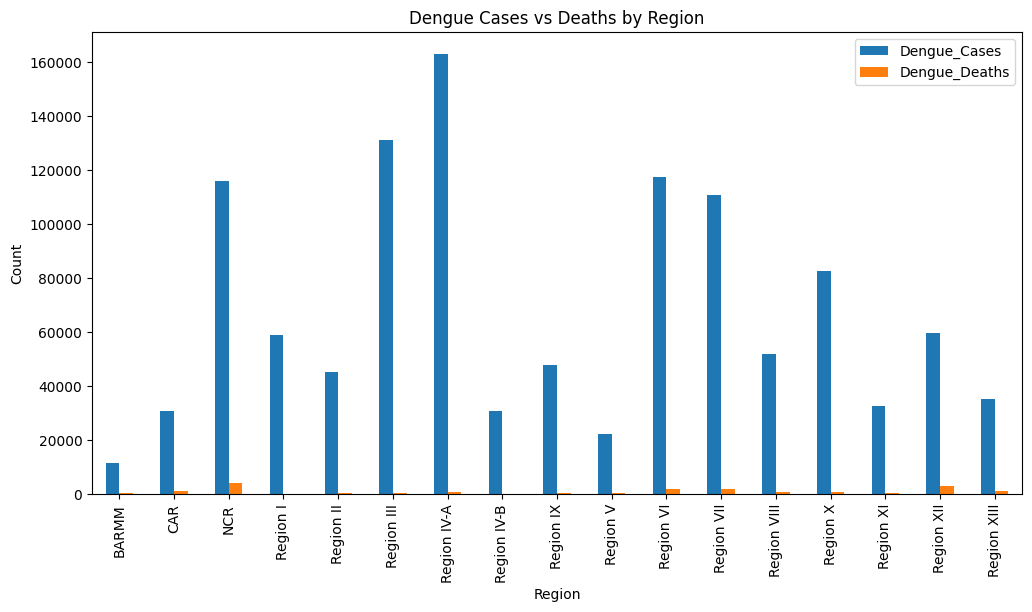

In [36]:
region_compare = dengue.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum()
region_compare.plot(kind='bar', figsize=(12,6))
plt.title('Dengue Cases vs Deaths by Region')
plt.ylabel('Count')
plt.show()


<h2> Insight: </h2>
<p>Regions with the most dengue cases do not always have the highest number of deaths. For example, Region IV-A may have many cases but a relatively lower death ratio compared to smaller regions with limited healthcare resources. This highlights the importance of strengthening healthcare infrastructure in less developed regions.</p>